In [1]:
import pandas as pd

import numpy as np

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

from yellowbrick.regressor import ResidualsPlot

import statsmodels.formula.api as sm

import seaborn as sns

In [2]:
base = pd.read_excel('Dados_ChequeEspecial_Regressao.xlsx')

In [3]:
base

,Salário,Limite do Cheque Especial
0,6800.00,2000
1,5000.00,1000
2,6320.00,1640
3,5214.00,500
4,6000.00,3600
5,15000.00,10000
6,22000.00,4000
7,4027.00,5000
8,8000.00,3350
9,7825.00,3000


In [4]:
# definir as variáveis x e y
x = base.iloc[:,0].values
y = base.iloc[:,1].values
print(y)

[ 2000  1000  1640   500  3600 10000  4000  5000  3350  3000  5000  1000
  3500  4140 10000  4000  6000  1780  2500  3000  2500  3000 35000  2500
  6000  3000 10000 10000  2350  1500  9900 18185 10000  8000  2500  5320
  5000  4930  1700]


In [5]:
# calculo de correlação
correlacao = np.corrcoef(x,y)
correlacao
# forte correlação positiva, conforme aumenta o salário, aumenta o valor de cheque especial

array([[1.        , 0.89112251],
       [0.89112251, 1.        ]])

In [7]:
# criar modelo de regressão
x = x.reshape(-1,1) # transformar para matriz
modelo = LinearRegression()
modelo.fit(x,y) # modelo é criado

LinearRegression()

In [ ]:
# y = b0+b1*x
# y = -339,63 + 0.55x

In [8]:
# visualizar o coeficiente b0. valor q intercepta o eixo y retorna -339.63
modelo.intercept_

-339.62810635733695

In [9]:
# visualizar o coeficiente b1, vlaor q intercepta o eixo x retorna 0.55
modelo.coef_

array([0.55453377])

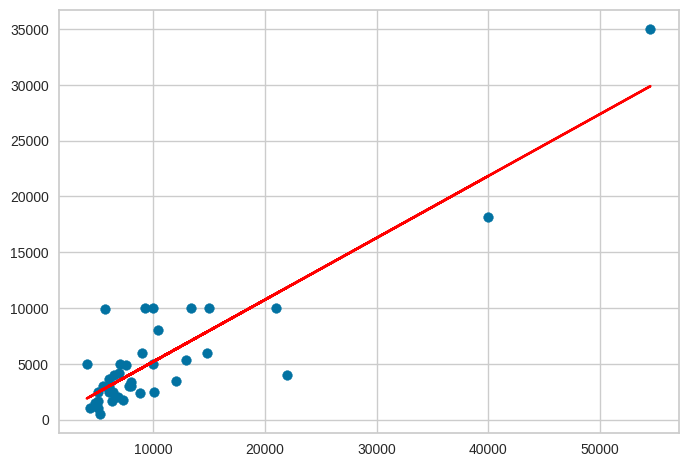

In [12]:
plt.scatter(x,y)
plt.plot(x, modelo.predict(x), color = "red")

In [13]:
# realizar uma previsão de cheque especial se o salario for 14800, vejamos como ficaria
print(modelo.coef_*14800+modelo.intercept_)

[7867.4716564]


In [14]:
modelo.predict([[14800]])

array([7867.4716564])

In [15]:
# coeficiente de determinação que mostra o quanto a variabilidade do y pode ser
# explicado pelo modelo
modelo.score(x,y)

0.7940993218924473

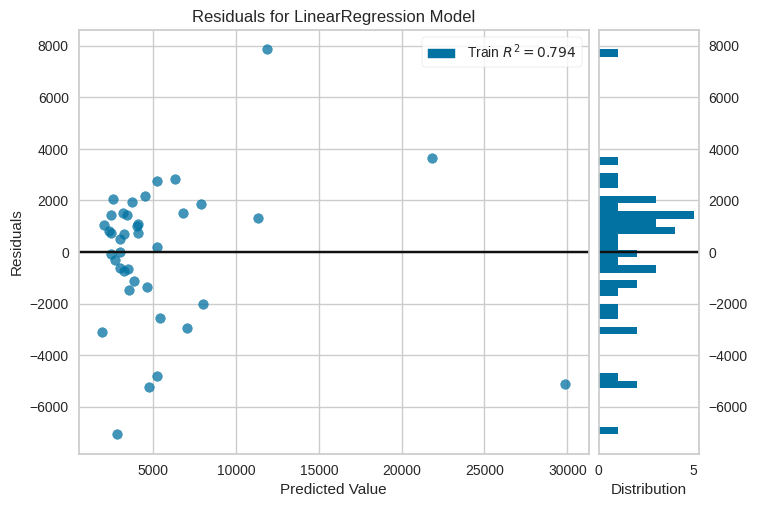

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [17]:
visualizador = ResidualsPlot(modelo)
visualizador.fit(x,y)
visualizador.poof()